In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
# FASE 1: FLUJO LIMPIEZA Y TRANSFORMACIÓN DE DATOS

# Pasos:
# Lectura de Datos
# Exploración inicial y estructura de los datos
# Identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes
# Transformación de tipo de datos y estandarización de nombre de variables
# Estadísticas básicas variables numéricas y frecuencias variables categóricas
# Limpieza y transformación dependiendo de lo anterior
# Identificación y gestión de nulos
# Unir los 2 data frames de la forma más eficiente
# Identificación y gestión de duplicados

## FASE 1

##### Lectura de Datos y exploración inicial:

# Customer_Flight_Activity

In [3]:
df_Flight_Activity = pd.read_csv('Customer_Flight_Activity.csv') 
df_Flight_Activity.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [4]:
df_Flight_Activity.tail()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


In [5]:
df_Flight_Activity.sample(5)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
166754,878240,2017,10,0,0,0,0,0.0,0,0
21660,354150,2017,2,0,0,0,0,0.0,0,0
111754,650553,2017,7,0,0,0,0,0.0,0,0
268566,901478,2018,4,0,0,0,0,0.0,0,0
371094,259878,2018,7,12,3,15,1290,129.0,534,43


In [6]:
def exploracion_inicial(df_Flight_Activity):
   
    print("Exploración inicial de Customer Flight Activity")
    print(f"Tamaño del DataFrame: {df_Flight_Activity.shape[0]} filas y {df_Flight_Activity.shape[1]} columnas")

    print("\nNombres de las columnas:")
    print(df_Flight_Activity.columns.tolist())

    print("\nTipos de datos por columna:")
    print(df_Flight_Activity.dtypes)

    print("\nEstadísticas descriptivas de columnas numéricas:")
    print(df_Flight_Activity.describe(include="all").T)

    print("\nCantidad de valores únicos por columna:")
    print(df_Flight_Activity.nunique())

exploracion_inicial(df_Flight_Activity)

Exploración inicial de Customer Flight Activity
Tamaño del DataFrame: 405624 filas y 10 columnas

Nombres de las columnas:
['Loyalty Number', 'Year', 'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']

Tipos de datos por columna:
Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object

Estadísticas descriptivas de columnas numéricas:
                                count           mean            std       min  \
Loyalty Number               405624.0  550037.873084  258935.286969  100018.0   
Year                         405624.0    2017.5000

In [ ]:
nulos_Flight_Activity = (df_Flight_Activity.isnull().sum() / len(df_Flight_Activity)) * 100
print(nulos_Flight_Activity) # comprobamos que no hay valores nulos. Hay 0 pero tienen sentido en sus columnas

Loyalty Number                 0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64


In [ ]:
# Para evitar posibles errores en la interpretación de datos, decidimos transfomrar la variable month de numérica a categórica.

print("Comprobación de valores únicos en Month antes de la conversión:")
print(df_Flight_Activity["Month"].unique())

Comprobación de valores únicos en Month antes de la conversión:
[ 1  9  2  3 11  4  5  7  6  8 10 12]


In [10]:
# Reemplazo de valores numéricos por nombres de meses

df_Flight_Activity["Month"] = df_Flight_Activity["Month"].replace({
    1: "Enero", 2: "Febrero", 3: "Marzo", 4: "Abril",
    5: "Mayo", 6: "Junio", 7: "Julio", 8: "Agosto",
    9: "Septiembre", 10: "Octubre", 11: "Noviembre", 12: "Diciembre"
})

# Conversión a una categoría ordenada (evitamos así que se ordene alfabéticamente)

df_Flight_Activity["Month"] = pd.Categorical(
    df_Flight_Activity["Month"],
    categories=["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio",
                "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"],
    ordered=True
)

In [ ]:
# Revisión los valores únicos después de la conversión

print("Valores únicos en Month tras la conversión:")
print(df_Flight_Activity["Month"].unique())


Valores únicos en Month tras la conversión:
['Enero', 'Septiembre', 'Febrero', 'Marzo', 'Noviembre', ..., 'Julio', 'Junio', 'Agosto', 'Octubre', 'Diciembre']
Length: 12
Categories (12, object): ['Enero' < 'Febrero' < 'Marzo' < 'Abril' ... 'Septiembre' < 'Octubre' < 'Noviembre' < 'Diciembre']


In [146]:
# Comprobación

df_Flight_Activity.sample(5)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
321616,127137,2018,Agosto,0,0,0,0,0.0,0,0
144514,596033,2017,Septiembre,0,0,0,0,0.0,0,0
233505,214639,2018,Febrero,10,1,11,1386,172.5,0,0
212675,564141,2018,Julio,16,0,16,3728,372.0,0,0
185476,975412,2017,Noviembre,0,0,0,0,0.0,0,0


##### Lectura de Datos y exploración inicial:

# Customer_Loyalty_History

In [21]:
df_Loyalty_History = pd.read_csv('Customer_Loyalty_History.csv') 
df_Loyalty_History.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [22]:
df_Loyalty_History.tail()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


In [23]:
df_Loyalty_History.sample(5)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
6416,602086,Canada,Ontario,London,M5B 3E4,Female,Bachelor,58005.0,Divorced,Nova,5142.39,Standard,2015,6,2017.0,11.0
12472,336484,Canada,Prince Edward Island,Charlottetown,C1A 6E8,Male,Bachelor,58511.0,Married,Star,5363.08,2018 Promotion,2018,3,NaN,NaN
14061,639584,Canada,Quebec,Montreal,H4G 3T4,Female,Bachelor,48697.0,Married,Star,5980.85,Standard,2013,1,2013.0,11.0
11199,119845,Canada,Quebec,Hull,J8Y 3Z5,Female,Bachelor,65690.0,Married,Star,2588.86,Standard,2014,2,NaN,NaN
1810,675057,Canada,Ontario,Trenton,K8V 4B2,Female,Bachelor,64259.0,Single,Aurora,6753.43,Standard,2013,3,NaN,NaN


In [24]:
def exploracion_inicial(df_Loyalty_History):
   
    print("Exploración inicial de Customer Loyalty History")
    print(f"Tamaño del DataFrame: {df_Loyalty_History.shape[0]} filas y {df_Loyalty_History.shape[1]} columnas")

    print("\nNombres de las columnas:")
    print(df_Loyalty_History.columns.tolist())

    print("\nTipos de datos por columna:")
    print(df_Loyalty_History.dtypes)

    print("\nEstadísticas descriptivas de columnas numéricas:")
    print(df_Loyalty_History.describe(include="all").T)

    print("\nCantidad de valores únicos por columna:")
    print(df_Loyalty_History.nunique())

exploracion_inicial(df_Loyalty_History)

Exploración inicial de Customer Loyalty History
Tamaño del DataFrame: 16737 filas y 16 columnas

Nombres de las columnas:
['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Cancellation Year', 'Cancellation Month']

Tipos de datos por columna:
Loyalty Number          int64
Country                object
Province               object
City                   object
Postal Code            object
Gender                 object
Education              object
Salary                float64
Marital Status         object
Loyalty Card           object
CLV                   float64
Enrollment Type        object
Enrollment Year         int64
Enrollment Month        int64
Cancellation Year     float64
Cancellation Month    float64
dtype: object

Estadísticas descriptivas de columnas numéricas:
                      count unique       top   freq           mea

In [25]:
# Observamos que la columna Cancellation month es numérica y decidimos hacerla categórica igual que en el otro df.

# Reemplazo de valores numéricos por nombres de meses

df_Loyalty_History["Cancellation Month"] = df_Loyalty_History["Cancellation Month"].replace({
    1: "Enero", 2: "Febrero", 3: "Marzo", 4: "Abril",
    5: "Mayo", 6: "Junio", 7: "Julio", 8: "Agosto",
    9: "Septiembre", 10: "Octubre", 11: "Noviembre", 12: "Diciembre"
})

# Conversión a una categoría ordenada (evitamos así que se ordene alfabéticamente)

df_Loyalty_History["Cancellation Month"] = pd.Categorical(
    df_Loyalty_History["Cancellation Month"],
    categories=["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio",
                "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"],
    ordered=True
)

In [26]:
# Revisión los valores únicos después de la conversión

print("Valores únicos en Month tras la conversión:")
print(df_Loyalty_History["Cancellation Month"].unique())

Valores únicos en Month tras la conversión:
[NaN, 'Enero', 'Diciembre', 'Abril', 'Febrero', ..., 'Junio', 'Octubre', 'Agosto', 'Septiembre', 'Marzo']
Length: 13
Categories (12, object): ['Enero' < 'Febrero' < 'Marzo' < 'Abril' ... 'Septiembre' < 'Octubre' < 'Noviembre' < 'Diciembre']


In [27]:
# Observamos que la columna country repite el total de filas (16737) como dato único Canadá

print(df_Loyalty_History["Country"].nunique())  # Comprobación

1


In [28]:
df_Loyalty_History.drop(columns=["Country"], inplace=True) # Al ser una columna que no aporta valor, la borramos (sabiendo que city y province siempre serán de Canadá)

In [30]:
def organizar_nulos(df_Loyalty_HistoryH):
   
    resumen = []

    for columna in df_Loyalty_History.columns:
        # Calcular el porcentaje de nulos
        nulos_pct = (df_Loyalty_History[columna].isnull().sum() / len(df_Loyalty_History)) * 100
        
        # Incluir solo columnas con nulos
        if nulos_pct > 0:
            tipo = "Numérica" if df_Loyalty_History[columna].dtype in ['int64', 'float64'] else "Categórica"

            # Agregar al resumen
            resumen.append({
                "Columna": columna,
                "Tipo": tipo,
                "Porcentaje_Nulos": nulos_pct
            })

    # Convertir a DataFrame y ordenar por porcentaje de nulos
    resumen_df_Loyalty_History = pd.DataFrame(resumen).sort_values(by="Porcentaje_Nulos", ascending=False)
    return resumen_df_Loyalty_History


resumen_nulos = organizar_nulos(df_Loyalty_History)
print(resumen_nulos)

              Columna        Tipo  Porcentaje_Nulos
1   Cancellation Year    Numérica         87.650117
2  Cancellation Month  Categórica         87.650117
0              Salary    Numérica         25.321145


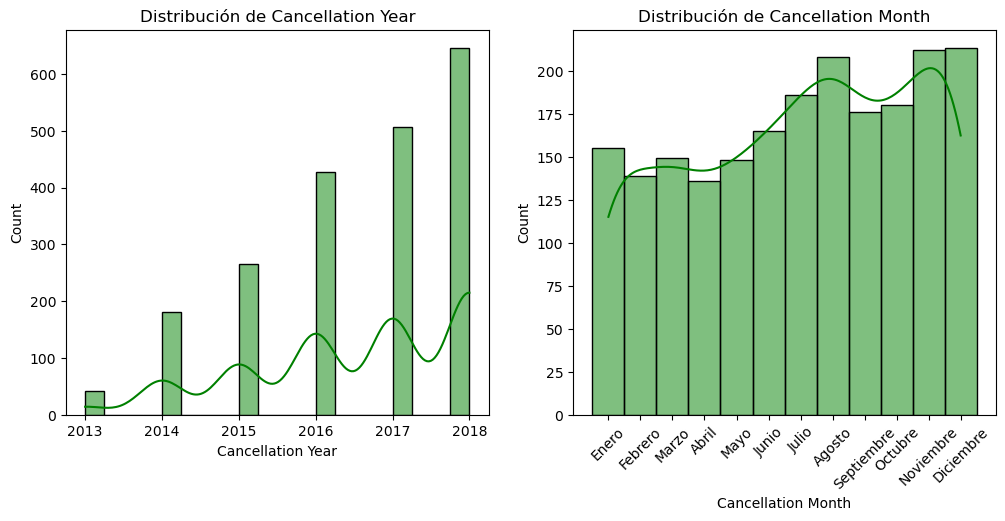

In [34]:
# Observamos un alto % de nulos en la variables numéricas de cancellation year y cancellation month (por ahora no queremos eliminarlas por si nos hiciera falta después).
# Vamos a valorar cómo se distribuyen estos nulos, es decir, si la distribución es simétrica o asimétrica.

import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de Cancellation Year
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_Loyalty_History["Cancellation Year"].dropna(), kde=True, bins=20, color="green")
plt.title("Distribución de Cancellation Year")

# Histograma de Cancellation Month
plt.subplot(1, 2, 2)
sns.histplot(df_Loyalty_History["Cancellation Month"].dropna(), kde=True, bins=12, color="green")
plt.xticks(rotation=45)
plt.title("Distribución de Cancellation Month")

plt.show()


In [38]:
# Imputamos Cancellation Year con la mediana (distribución asimétrica)
df_Loyalty_History["Cancellation Year"].fillna(df_Loyalty_History["Cancellation Year"].median())

# Verificamos que ya no hay valores nulos
print(df_Loyalty_History["Cancellation Year"].isnull().sum())


0


In [40]:
# Imputamos Cancellation Month con la moda (distribución simétrica, valores categóicos)
# Obtener el mes más frecuente (moda)
moda_mes = df_Loyalty_History["Cancellation Month"].mode()[0]

# Rellenar valores nulos con la moda
df_Loyalty_History["Cancellation Month"].fillna(moda_mes, inplace=True)


In [41]:
print(df_Loyalty_History.loc[df_Loyalty_History["Cancellation Year"].isnull()])
print(df_Loyalty_History.loc[df_Loyalty_History["Cancellation Month"].isnull()])

# Comprobación de que ya no existen nulos en estas columnas.

Empty DataFrame
Columns: [Loyalty Number, Province, City, Postal Code, Gender, Education, Salary, Marital Status, Loyalty Card, CLV, Enrollment Type, Enrollment Year, Enrollment Month, Cancellation Year, Cancellation Month]
Index: []
Empty DataFrame
Columns: [Loyalty Number, Province, City, Postal Code, Gender, Education, Salary, Marital Status, Loyalty Card, CLV, Enrollment Type, Enrollment Year, Enrollment Month, Cancellation Year, Cancellation Month]
Index: []


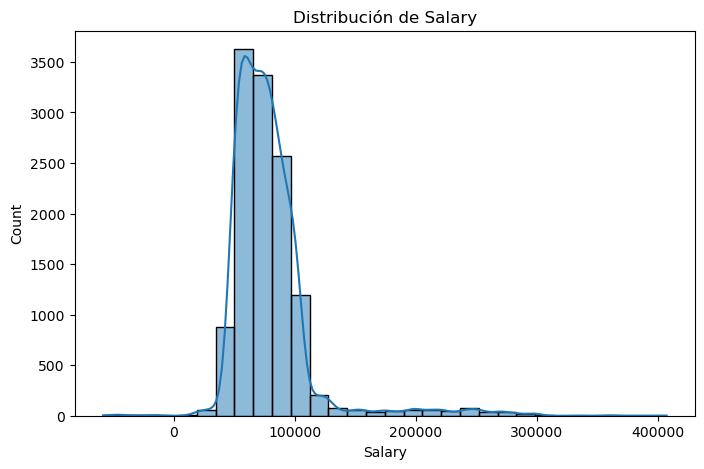

In [ ]:
# Histograma de Salary (variable numérica con bajo % de nulos), si es simétrica imputaremos con la media.

plt.figure(figsize=(8, 5))
sns.histplot(df_Loyalty_History["Salary"].dropna(), kde=True, bins=30)
plt.title("Distribución de Salary")
plt.show()


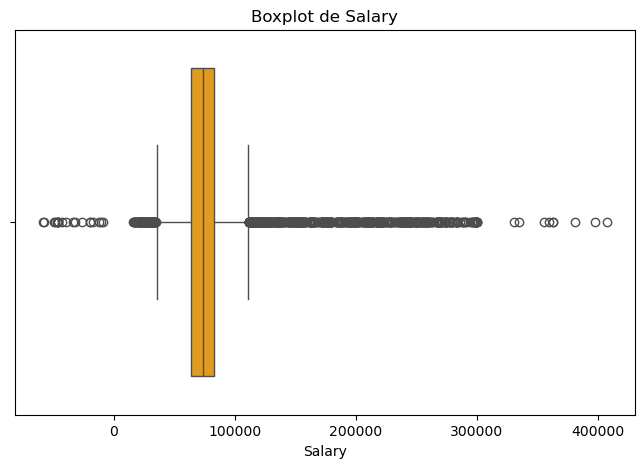

In [47]:
# Queremos valorar la distribucion de los datos (variable numérica con bajo % de nulos)
# Para decidir con qué imputar los nulos, si es simétrica imputaremos con la media.

plt.figure(figsize=(8,5))
sns.boxplot(x=df_Loyalty_History["Salary"], color="orange")
plt.title("Boxplot de Salary")
plt.show()


In [48]:
# Comprobamos que no es simétrica (y que hay muchos outliers), por tanto, imputamos con mediana.

df_Loyalty_History["Salary"].fillna(df_Loyalty_History["Salary"].median())

0         83236.0
1         73455.0
2         73455.0
3         73455.0
4        103495.0
           ...   
16732     73455.0
16733     89210.0
16734     73455.0
16735    -57297.0
16736     75049.0
Name: Salary, Length: 16737, dtype: float64

In [49]:
print("¿Quedan valores nulos en el DataFrame CLH?", df_Loyalty_History.isnull().values.any()) # Comporbación final de nulos en el df Loyalty History

¿Quedan valores nulos en el DataFrame CLH? False
